# Kaggle 신용카드 사기 검출 (Google Drive Mount)
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : 0 (정상), 1 (사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive

# drive.mount('/content/drive', force_remount=True)

* 마운트 결과 확인

In [ ]:
# !ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
# !unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

* creditcard.csv 파일 확인

In [ ]:
# !ls -l

> ## 2) 데이터 읽어오기

* pandas DataFrame

In [ ]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* 0 (정상) Class와 1 (사기) Class 비율

In [ ]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [ ]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


- 탐색적 데이터 분석
    - 분포 시각화 하기

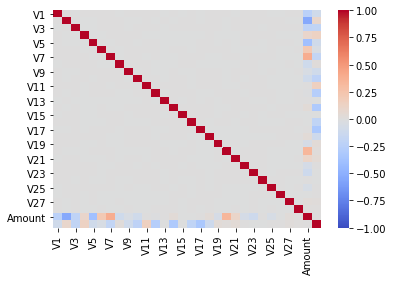

In [ ]:
import seaborn as sns
import matplotlib as plt

sns.heatmap(DF.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)
# 히트맵 분석에서 상관계수를 통하여 'Class' - feature와 연관성이 높은 Feature를 찾기 못하였다.

> ## 4) train_test_split

* X (Input), y (Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1].astype(float)

X.shape, y.shape

((284807, 29), (284807,))

* Without 'stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((170884, 29), (170884,), (113923, 29), (113923,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.829709
1     0.170291
Name: Class, dtype: float64
Test_Data : 
 0    99.823565
1     0.176435
Name: Class, dtype: float64


* With 'Stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827368
1     0.172632
Name: Class, dtype: float64
Test_Data : 
 0    99.827076
1     0.172924
Name: Class, dtype: float64


## 4) SMOTE
- SMOTE란?: Y값들을 KNN기법을 이용하여 오버샘플링하여 데이터를 증폭하여 Train  Data를 늘리는 기법  
(Positive_Label_Data와 Negative_Label_Data의 수가 같아진다)

In [ ]:
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state = 2045)
X_train_OS, y_train_OS = OS.fit_sample(X_train, y_train)
X_train_OS.shape, y_train_OS.shape

((398040, 29), (398040,))

# III. Modeling

## 1) Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic 모델 생성
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)

# Logistic 모델에 test 데이터를 넣어 모델의 예측값 y_hat을 추출
y_hat = Model_LR.predict(X_test)

# 실제 데이터인 y_test와 예측값인 y_hat을 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# Train : Test = 6 : 4의 Recall_Score : 71점, F1_Score: 77점
# Train : Test = 7 : 3의 Recall_Score : 75점, F1_Score: 80점
# Train : Test = 8 : 2의 Recall_Score : 71점, F1_Score: 80점

Accuracy_Score: 0.9993065491603979
Precision_Score: 0.8641975308641975
Recall_Score: 0.7106598984771574
F1_Score: 0.7799442896935933


## 2) DecisionTree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# DecisionTree 모델 생성
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train, y_train)

# DecisionTree 모델에 test 데이터를 넣어 모델의 예측값 y_hat을 추출
y_hat = Model_DT.predict(X_test)

# 실제 데이터인 y_test와 예측값인 y_hat을 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# Train : Test = 6 : 4의 Recall_Score : 74점, F1_Score: 75점
# Train : Test = 7 : 3의 Recall_Score : 74점, F1_Score: 74점
# Train : Test = 8 : 2의 Recall_Score : 87점, F1_Score: 82점

Accuracy_Score: 0.9992392589211521
Precision_Score: 0.7748344370860927
Recall_Score: 0.7905405405405406
F1_Score: 0.7826086956521738


- DecisionTree Model With SMOTE  
  SMOTE란?: Y값들을 KNN기법을 이용하여 오버샘플링하여 데이터를 증폭하여 Train Data를 늘리는 기법  
  (Positive_Label_Data와 Negative_Label_Data의 수가 같아진다)

In [ ]:
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state = 2045)
X_train_OS, y_train_OS = OS.fit_sample(X_train, y_train)
X_train_OS.shape, y_train_OS.shape

((398040, 26), (398040,))

- DecisionTree Model Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# DecisionTree_Pruning 모델 생성
Model_DT_PR = DecisionTreeClassifier(max_depth = 5)
Model_DT_PR.fit(X_train_OS, y_train_OS)

# DecisionTree_Pruning 모델에 test 데이터를 넣어 모델의 예측값 y_hat을 추출
y_hat = Model_DT_PR.predict(X_test)

# 실제 데이터인 y_test와 예측값인 y_hat을 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# max_depth = 3
# Train : Test = 6 : 4의 Recall_Score : 72점, F1_Score: 76점
# Train : Test = 7 : 3의 Recall_Score : 81점, F1_Score: 81점
# Train : Test = 8 : 2의 Recall_Score : 82점, F1_Score: 85점

# max_depth = 5
# Train : Test = 6 : 4의 Recall_Score : 74점, F1_Score: 80점
# Train : Test = 7 : 3의 Recall_Score : 83점, F1_Score: 85점
# Train : Test = 8 : 2의 Recall_Score : 82점, F1_Score: 87점

# max_depth = 7
# Train : Test = 6 : 4의 Recall_Score : 71점, F1_Score: 79점
# Train : Test = 7 : 3의 Recall_Score : 83점, F1_Score: 86점
# Train : Test = 8 : 2의 Recall_Score : 75점, F1_Score: 79점

Accuracy_Score: 0.9741933218636986
Precision_Score: 0.05915130732961852
Recall_Score: 0.9324324324324325
F1_Score: 0.11124546553808948


- Decision Tree Model의 Importances를 확인하여 필요없는 feature를 확인하고 줄이기

In [ ]:
Model_DT_PR.feature_importances_

array([0.01116995, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06498814, 0.        , 0.0699968 , 0.00250214,
       0.12257226, 0.00357606, 0.0216525 , 0.63370038, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05341607, 0.        , 0.        ,
       0.0164257 ])

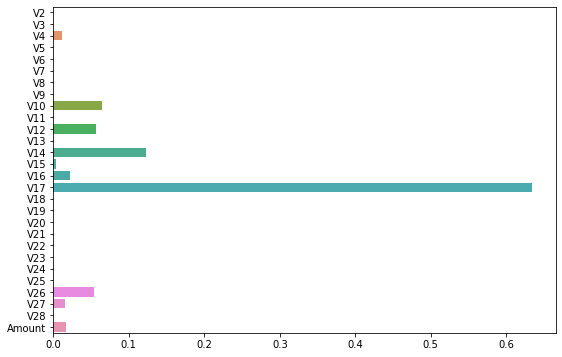

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(Model_DT_PR.feature_importances_,
            X.columns)
plt.show()

## 3) LightGBM Model

Boost계열의 경량형 LightGMB - 한번에 여러개의 나무를 생성하여 병렬계산하는 RandomForest방식과는 다르게  
하나의 나무를 생성하고 그 나무의 단점을 보완하여 다음 나무를 순차적으로 만드는 방식

-n_estimators : 모델링에 사용되는 Tree의 개수  
-num_leaves : 최대 Terminal Node 개수  
-boost_from_average : 불균형 데이터일 경우 'False' 지정  
-learning_rate : 0~1 사이의 값  
-max_depth : Tree의 최대 크기(깊이)  
-min_child_samples : Terminal Node의 최소 Datapoint 개수  

In [ ]:
from lightgbm import LGBMClassifier

# MLP 모델에 Train 데이터를 넣어 모델 생성
Model_LGBM = LGBMClassifier(n_estimators = 1500,
                            num_leaves = 64,
                            n_jobs = -1,
                            boost_from_average = False)

Model_LGBM.fit(X_train_OS, y_train_OS)

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1500,
               n_jobs=-1, num_leaves=64, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

- LightGBM 모델 평가

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# test데이터를 통해서 모델의 예측값을 y_hat으로 추출
y_hat = Model_LGBM.predict(X_test)

# 모델이 예측한 y_hat과 y_test데이터를 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# Recall_Score : 85점, F1_Score: 85점

Accuracy_Score: 0.9994967405170698
Precision_Score: 0.8523489932885906
Recall_Score: 0.8581081081081081
F1_Score: 0.8552188552188552


## 4) MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier

# MLP 모델에 Train 데이터를 넣어 모델 생성
Model_MLP = MLPClassifier(hidden_layer_sizes = (64),
                         activation = 'logistic',
                         solver ='adam', 
                         max_iter = 5000,
                         random_state = 2045)

Model_MLP.fit(X_train_OS, y_train_OS)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=64, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2045, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

- MLP 모델 평가

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# test데이터를 통해서 모델의 예측값을 y_hat으로 추출
y_hat = Model_LGBM.predict(X_test)

# 모델이 예측한 y_hat과 y_test데이터를 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# Recall_Score : 85점, F1_Score: 85점

Accuracy_Score: 0.9994967405170698
Precision_Score: 0.8523489932885906
Recall_Score: 0.8581081081081081
F1_Score: 0.8552188552188552


## 5) DNN Model

In [ ]:
from keras import models, layers

# DNN모델 생성 밑 파라미터 설정
# input_shape는 들어가는 학습데이터 X_train의 feature의 갯수와 같아야한다 ( 2의배수 2,4,6,8,16,32,64 ... 로 하는것이 좋다)
Model_DNN = models.Sequential(
    Dense(16, activation = 'relu', input_shape = (29,)),
    Dropout(0.25),
    Dense(12, activation = 'relu'),
    Dense(14, activation = 'relu'),
    Dropout(0.25),
    Dense(1, activation = 'sigmoid')
)

# 모델구조 확인
Model_DNN.summary()

# 모델 학습방법 선택
Model_DNN.compile(loss = 'binary_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['binary_accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 240       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습 시작하기

History_DNN = Model_DNN.fit(X_train_OS, y_train_OS,
                              epochs = 25,
                              batch_size = 1024,
                              validation_data = (X_test, y_test))

Epoch 1/25
389/389 [==============================] - 9s 22ms/step - loss: 0.0492 - binary_accuracy: 0.9837 - val_loss: 0.0523 - val_binary_accuracy: 0.9810
Epoch 2/25
389/389 [==============================] - 9s 22ms/step - loss: 0.0429 - binary_accuracy: 0.9854 - val_loss: 0.0557 - val_binary_accuracy: 0.9801
Epoch 3/25
389/389 [==============================] - 9s 22ms/step - loss: 0.0409 - binary_accuracy: 0.9862 - val_loss: 0.0587 - val_binary_accuracy: 0.9803
Epoch 4/25
389/389 [==============================] - 9s 23ms/step - loss: 0.0396 - binary_accuracy: 0.9868 - val_loss: 0.0426 - val_binary_accuracy: 0.9855
Epoch 5/25
389/389 [==============================] - 9s 23ms/step - loss: 0.0385 - binary_accuracy: 0.9871 - val_loss: 0.0469 - val_binary_accuracy: 0.9843
Epoch 6/25
389/389 [==============================] - 9s 22ms/step - loss: 0.0374 - binary_accuracy: 0.9877 - val_loss: 0.0630 - val_binary_accuracy: 0.9791
Epoch 7/25
389/389 [==============================] - 9s 2

- 학습결과 시각화

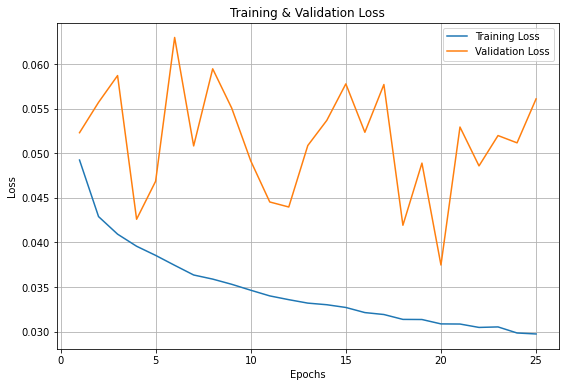

In [ ]:
import matplotlib.pyplot as plt

# Loss 시각화
epochs = range(1, len(History_DNN.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History_DNN.history['loss'])
plt.plot(epochs, History_DNN.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

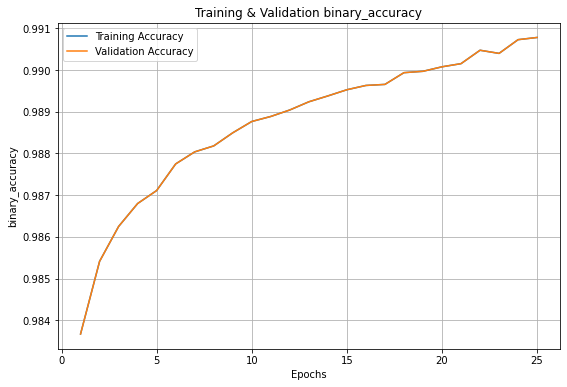

In [ ]:
import matplotlib.pyplot as plt

#Accuracy 시각화
epochs = range(1, len(History_DNN.history['binary_accuracy']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History_DNN.history['binary_accuracy'])
plt.plot(epochs, History_DNN.history['binary_accuracy'])
plt.title('Training & Validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

- 모델 평가하기

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# test데이터를 통해서 모델의 예측값을 y_hat으로 추출
y_hat = Model_DNN.predict_classes(X_test)

# 모델이 예측한 y_hat과 y_test데이터를 비교
confusion_matrix(y_test, y_hat)

# 정확도, 예측도, 재현율, F1스코어 확인
print(f'Accuracy_Score: {accuracy_score(y_test, y_hat)}')
print(f'Precision_Score: {precision_score(y_test, y_hat, pos_label = 1)}')
print(f'Recall_Score: {recall_score(y_test, y_hat, pos_label = 1)}')
print(f'F1_Score: {f1_score(y_test, y_hat, pos_label = 1)}')

# Recall_Score : 85점, F1_Score: 85점

Accuracy_Score: 0.983778659457182
Precision_Score: 0.09114927344782034
Recall_Score: 0.9324324324324325
F1_Score: 0.16606498194945848
